# Wind Model for Prediction

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
import pandas as pd
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_45bf43b2999d4e748ca13e89a0c5fc64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2-Wq8RQj6UYD83ivZdzFh-r-CruyydtU1mc6xGNW204f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_45bf43b2999d4e748ca13e89a0c5fc64.get_object(Bucket='predictingtheenergyoutputofwindtu-donotdelete-pr-mdefl0pcqpzq9d',Key='wind_speed_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (degrees)  
0                     416.328908                259.994904  
1                     519.917511                268.641113  
2                     390.900016                272.564789  
3                     516.127569                271.258087  
4                     491.702972                265.674286

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (degrees)       50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


# Visualization of data

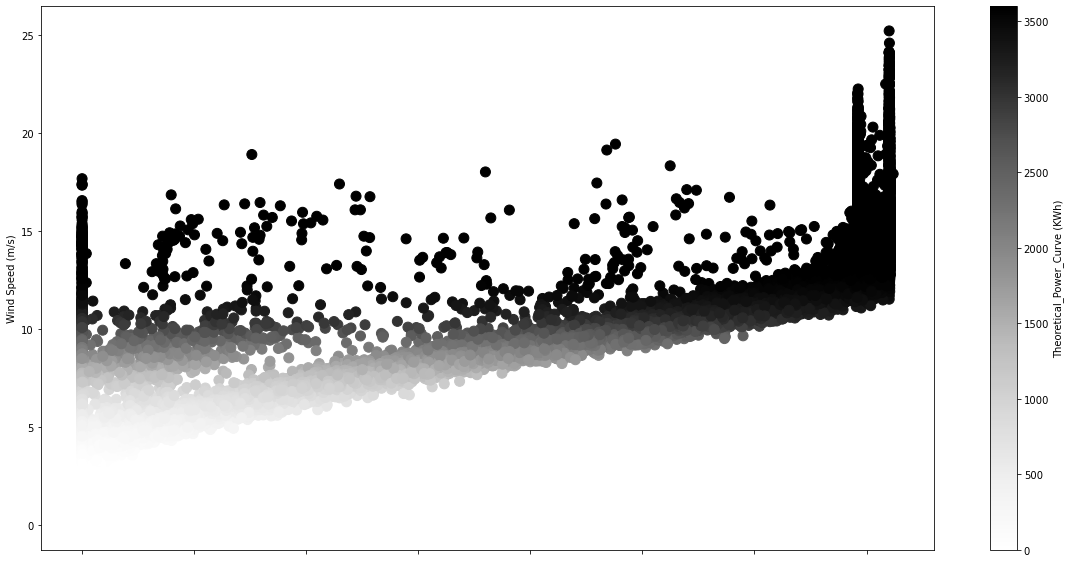

In [4]:
df.plot.scatter(x='LV ActivePower (kW)',y='Wind Speed (m/s)',c='Theoretical_Power_Curve (KWh)',s=100,figsize=(20,10))

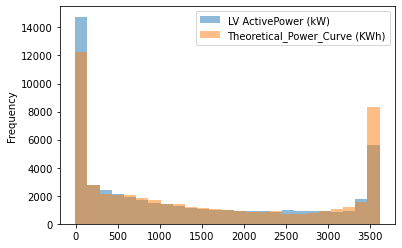

In [5]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)']].plot.hist(alpha=0.5,bins=25)

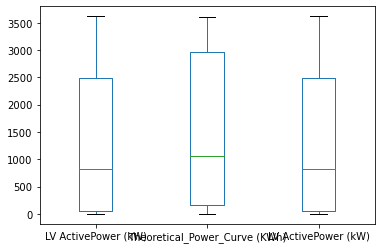

In [6]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].plot.box()

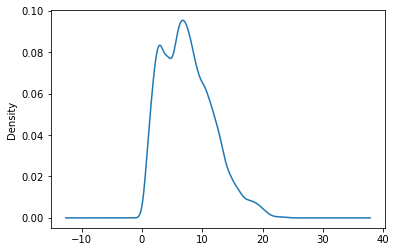

In [7]:
df['Wind Speed (m/s)'].plot.kde()

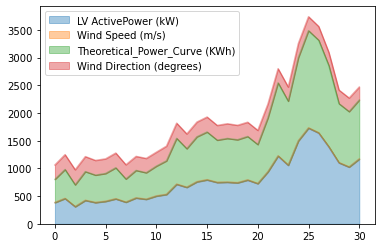

In [8]:
df.loc[0:30].plot.area(alpha=0.4)

# Taking care of missing data

In [9]:
df.isnull().sum() 

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (degrees)         0
dtype: int64

we use df.fillna(df.mean(),inplace=True) in case of missing data.
Since no data is missing so we skip adding data

In [10]:
X = df[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (degrees)']]
y= df['LV ActivePower (kW)']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[09:20:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

In [ ]:
y_pred

In [17]:
#xgb.save_model("wind_energy.pkl")

In [18]:
import joblib
#save model
joblib.dump(rfc, "wind_energy.pkl") 

#load saved model
m = joblib.load("wind_energy.pkl")

In [19]:
prediction=m.predict([[34.67,21,45]])

In [20]:
prediction[0]

1162.0512052765487

In [21]:
pip install ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [22]:
wml_credentials = {
                      "apikey":"L1-qvZWih6iLNKtespNQsGVQ5zDa7ydNzhVZNGhJ7TXW",
                      "url": "https://us-south.ml.cloud.ibm.com"
}

In [23]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

2020-12-17 06:30:23,606 - ibm_watson_machine_learning.wml_client_error - WARNING - Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/4c0561b3-b947-48dc-8520-7ffdd6bf83ed/predictions?version=2020-08-01)
Status code: 400, body: {"trace": "63cff92862bc1a5dd025dca1ebd0a3a1", "errors": [{"code": "invalid_input_data", "message": "Feature number mismatch. Number of features of the input data must match the number of features of the model", "target": {"type": "field", "name": "values"}}], "status_code": 400}



In [24]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [25]:
def guid_from_space_name(wml_client, space_name):
     instance_details = wml_client.service_instance.get_details()
     space = wml_client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [26]:
space_uid = "ff0b0cd8-aa87-4c8f-b468-b78244f2fe99"
#guid_from_space_name(wml_client, 'Deployment of Energy Output').   not working instances not found

In [27]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [28]:
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7')
meta_props={
 wml_client.repository.ModelMetaNames.NAME: "EnergyOutputPrediction",
 wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id,
 wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
}

In [29]:
model_artifact = wml_client.repository.store_model(xgb,
                                                meta_props=meta_props,
                                                training_data=X_train,
                                                training_target=y_train)
model_uid = wml_client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 22132f2d-154e-40db-ab4f-223d3c01c6be


In [30]:
model_details = wml_client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'label_column': 'LV ActivePower (kW)',
            'software_spec': {'id': 'e4429883-c883-42b6-87a8-f419d64088cd',
                              'name': 'default_py3.7'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'id': '1',
                                          'location': {},
                                          'schema': {'fields': [{'name': 'Wind '
                                                                         'Speed '
                                                                         '(m/s)',
                                                                 'type': 'float64'},
                                                                {'name': 'Theoretical_Power_Curv

In [31]:
deploy_meta = {
     wml_client.deployments.ConfigurationMetaNames.NAME: "Predict Energy Output",
     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

In [32]:
deployment_details = wml_client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '22132f2d-154e-40db-ab4f-223d3c01c6be' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4c0561b3-b947-48dc-8520-7ffdd6bf83ed'
------------------------------------------------------------------------------------------------




In [33]:
deployment_uid = wml_client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 4c0561b3-b947-48dc-8520-7ffdd6bf83ed


In [34]:
job_payload = {
   wml_client.deployments.ScoringMetaNames.INPUT_DATA: [{
     'values': [list(X_test['Wind Speed (m/s)']), list(X_test['Theoretical_Power_Curve (KWh)']), list(X_test['Wind Direction (degrees)'])]
   }]
 }
pprint(job_payload)

{'input_data': [{'values': [[5.95249605178833,
                             8.13491821289062,
                             8.20711517333984,
                             11.830909729003901,
                             4.29070091247558,
                             2.39745092391967,
                             9.93638515472412,
                             14.427680015563901,
                             2.23681092262268,
                             1.6919970512390101,
                             5.80398416519165,
                             7.96921491622924,
                             5.21127700805664,
                             3.17312097549438,
                             9.86702728271484,
                             18.6848392486572,
                             12.4558601379394,
                             1.4528180360793999,
                             8.57926654815673,
                             14.829090118408198,
                             3.28179788589477,
   

                             8.458253860473631,
                             11.6671199798583,
                             5.25061178207397,
                             16.5853004455566,
                             1.8893790245056101,
                             1.51793503761291,
                             4.02420282363891,
                             12.351710319519,
                             1.62741601467132,
                             3.37368202209472,
                             2.00461602210998,
                             11.7183599472045,
                             13.714639663696198,
                             12.004309654235803,
                             2.2488560676574703,
                             14.4442300796508,
                             5.747825145721429,
                             7.19262504577636,
                             13.8888702392578,
                             5.08408784866333,
                             7.401707172393791,
   

                             2.54128694534301,
                             5.3921890258789,
                             3.3746140003204306,
                             4.434104919433589,
                             6.237164974212639,
                             9.47576522827148,
                             10.8455295562744,
                             2.1905488967895503,
                             8.29908752441406,
                             7.79334878921508,
                             10.9467697143554,
                             7.93192911148071,
                             11.845820426940902,
                             5.94205904006958,
                             12.039349555969201,
                             3.535325050354,
                             1.9072229862213101,
                             8.58321952819824,
                             13.9133100509643,
                             5.79196405410766,
                             1.97583496570587,
    

                             9.89211273193359,
                             2.4627399444580003,
                             3.30805110931396,
                             3.2309150695800697,
                             12.347999572753901,
                             2.58386707305908,
                             8.50184535980224,
                             1.5537010431289597,
                             3.02359795570373,
                             13.813050270080499,
                             6.31956577301025,
                             3.2324020862579306,
                             2.50363302230834,
                             9.826414108276358,
                             7.49413776397705,
                             8.617562294006339,
                             11.9325199127197,
                             1.4881060123443601,
                             13.8074398040771,
                             6.17181396484375,
                             2.1425480842590

                             21.599479675292898,
                             1.79677700996398,
                             5.02643108367919,
                             12.4936800003051,
                             8.54507064819335,
                             10.5242700576782,
                             2.99623703956604,
                             11.5370903015136,
                             2.7021141052246,
                             6.69437503814697,
                             2.66150593757629,
                             12.991640090942301,
                             3.66624402999877,
                             7.4145002365112305,
                             5.22557210922241,
                             5.71241092681884,
                             3.04327297210693,
                             9.6998233795166,
                             7.62572908401489,
                             8.50872230529785,
                             12.950119972228999,
       

                             0.44049420952796897,
                             6.53933906555175,
                             4.72207498550415,
                             5.21576023101806,
                             6.16768312454223,
                             12.516050338745101,
                             3.95608401298522,
                             13.833849906921301,
                             7.59743213653564,
                             6.84113311767578,
                             8.73802471160888,
                             12.822750091552699,
                             1.93953895568847,
                             1.22583103179931,
                             3.3625679016113197,
                             5.80258417129516,
                             1.88338804244995,
                             8.351364135742179,
                             6.53898811340332,
                             10.1618700027465,
                             2.30756306648254,
 

                             10.6684503555297,
                             11.9201297760009,
                             5.82365989685058,
                             8.28773880004882,
                             2.9047260284423797,
                             12.0589504241943,
                             11.886070251464801,
                             12.5347700119018,
                             5.911028861999509,
                             7.68234205245971,
                             6.05591583251953,
                             10.6911296844482,
                             2.85659503936767,
                             19.5059795379638,
                             13.947130203247001,
                             3.7331080436706503,
                             8.77728366851806,
                             7.029582977294919,
                             9.784031867980948,
                             8.79216194152832,
                             11.8936700820922,
  

                             16.115770339965803,
                             12.3941097259521,
                             10.6111898422241,
                             4.313236236572259,
                             3.2103118896484304,
                             15.813329696655199,
                             8.81495952606201,
                             13.6571397781372,
                             1.3040469884872399,
                             8.393427848815909,
                             5.14222288131713,
                             4.25659418106079,
                             8.94369411468505,
                             11.9330997467041,
                             3.3012819290161097,
                             13.996760368347099,
                             9.381701469421381,
                             4.45119285583496,
                             13.2092695236206,
                             7.349095821380611,
                             12.230270385742

                             5.719145774841301,
                             3.07243299484252,
                             12.4557800292968,
                             7.839837074279781,
                             3.2730000019073398,
                             13.7365999221801,
                             15.713809967041,
                             3.8206810951232897,
                             12.766519546508698,
                             6.8600749969482395,
                             8.51537227630615,
                             5.27086591720581,
                             4.10110187530517,
                             11.634249687194801,
                             11.2127895355224,
                             1.4588019847869798,
                             1.7610290050506499,
                             3.4884469509124703,
                             20.1940002441406,
                             9.23200702667236,
                             8.849251747131

                             10.2771100997924,
                             10.564809799194302,
                             3.3389849662780695,
                             3.43088293075561,
                             5.74967098236083,
                             8.47653484344482,
                             3.12474489212036,
                             4.24544191360473,
                             7.7411789894104,
                             8.9397382736206,
                             2.57040810585021,
                             7.346372127532951,
                             4.13098287582397,
                             3.76220297813415,
                             1.18488705158233,
                             8.55148792266845,
                             5.35750913619995,
                             10.8684797286987,
                             5.6598482131958,
                             15.1787099838256,
                             5.812094211578361,
          

                             7.29863500595092,
                             1.4020450115203797,
                             11.1045503616333,
                             3.0879230499267503,
                             5.32885694503784,
                             10.729249954223599,
                             13.259369850158599,
                             2.1440680027008,
                             2.47577190399169,
                             15.4321699142456,
                             5.09610891342163,
                             6.315792083740231,
                             5.67853307723999,
                             3.9756660461425697,
                             8.80809783935546,
                             2.38690495491027,
                             12.149450302124,
                             15.3486003875732,
                             3.3138420581817596,
                             5.5009422302246,
                             3.6333949565887402,
 

                             5.03772211074829,
                             10.193779945373501,
                             2.02183890342712,
                             11.286580085754302,
                             4.70148992538452,
                             2.15294408798217,
                             9.473885536193839,
                             5.14648580551147,
                             5.49599599838256,
                             1.0495029687881399,
                             4.95573091506958,
                             11.7542400360107,
                             3.0776979923248198,
                             5.11253595352172,
                             12.261859893798801,
                             5.478546142578121,
                             4.30260181427001,
                             20.7146301269531,
                             4.773271083831781,
                             6.070556163787839,
                             13.9120903015136,

                             4.24248313903808,
                             6.294204235076901,
                             12.037210464477502,
                             7.71841812133789,
                             6.63990020751953,
                             6.48028802871704,
                             13.9044799804687,
                             6.951511859893791,
                             15.2173900604248,
                             5.646275997161861,
                             11.031970024108801,
                             3.8860828876495295,
                             1.76803004741668,
                             4.20448303222656,
                             4.752635955810541,
                             10.8951797485351,
                             7.09672117233276,
                             7.068597793579099,
                             5.583891868591301,
                             2.4810740947723304,
                             7.61661100387573,

                             13.5862503051757,
                             13.078829765319801,
                             2.7722780704498198,
                             9.06685638427734,
                             3.13224911689758,
                             5.73197793960571,
                             2.36168503761291,
                             1.8592050075531,
                             5.429334163665769,
                             4.915093898773191,
                             2.51068806648254,
                             1.02094101905822,
                             8.11038303375244,
                             13.674320220947198,
                             8.898982048034659,
                             10.598719596862699,
                             9.96971607208251,
                             6.5170202255249,
                             6.73230981826782,
                             9.82361221313476,
                             10.051870346069302,
  

                             3526.44485408739,
                             3560.1483451194104,
                             2077.3538341967896,
                             644.542852225972,
                             504.90705802096494,
                             355.76917271867995,
                             1852.0387401252103,
                             1170.04956320438,
                             2089.7234941629604,
                             471.08277604026904,
                             0.0,
                             447.77874287346197,
                             890.3483623894949,
                             102.44629843998699,
                             1003.0778695442401,
                             791.100767306095,
                             3600.0,
                             417.340097643273,
                             213.58341382683997,
                             0.0,
                             3600.0,
                             0.0,
  

                             587.469999764922,
                             1353.78135330429,
                             3255.44841185211,
                             2708.86062751326,
                             285.648044770876,
                             3600.0,
                             25.718991696111498,
                             3457.6011791875703,
                             927.2977463165421,
                             0.0,
                             0.0,
                             1440.4116920236402,
                             339.702081594983,
                             3600.0,
                             245.124118725994,
                             259.34120369327997,
                             3600.0,
                             3596.9100781215298,
                             3099.67663848739,
                             1698.8044300485599,
                             2846.5421463281396,
                             0.0,
                    

                             2401.89482446212,
                             578.193793615439,
                             856.172524866866,
                             3600.0,
                             1170.73766226059,
                             1376.89054413444,
                             2530.6472618414,
                             0.0,
                             2876.7359612156,
                             2630.03214525086,
                             2653.43279220966,
                             3595.1357821696997,
                             693.208374259531,
                             860.601417164642,
                             479.31861496385903,
                             2350.4900597137303,
                             1117.6973631819,
                             1145.1886366502902,
                             3218.19647993973,
                             0.0,
                             1207.14651302822,
                             0.0,
          

                             0.0,
                             0.0,
                             3241.7546997764803,
                             1152.9995923144302,
                             3600.0,
                             522.4342775458609,
                             3600.0,
                             545.531948642585,
                             3600.0,
                             3022.3281386992403,
                             1714.82941346684,
                             1706.16169975604,
                             1553.25403928011,
                             233.672966804543,
                             330.718492935264,
                             3600.0,
                             2125.33408561928,
                             62.772118155485295,
                             3459.72814866712,
                             3600.0,
                             801.191154624758,
                             0.0,
                             793.281662925266,

                             634.1433211818991,
                             529.384636747796,
                             0.0,
                             3600.0,
                             2209.86912585464,
                             437.351714129504,
                             462.713077392216,
                             0.0,
                             531.3121494015201,
                             0.0,
                             2598.2797021144297,
                             0.0,
                             0.0,
                             3600.0,
                             678.032443144067,
                             3485.05734439697,
                             103.817320487001,
                             1166.85411585034,
                             3024.44484883354,
                             18.8468763569663,
                             668.731999741275,
                             2531.14793986697,
                             1147.61196490278,


                             0.0,
                             554.310792516118,
                             1024.9844872299302,
                             27.7413337675071,
                             54.7728846615209,
                             3431.06678045029,
                             1774.9146426227699,
                             0.0,
                             1763.27583011071,
                             502.893100536956,
                             284.749090662602,
                             0.0,
                             3600.0,
                             3583.9293566001897,
                             3352.5063980219397,
                             0.0,
                             3600.0,
                             658.851093573759,
                             3004.57056986044,
                             1097.16738333556,
                             773.054895180648,
                             732.963997640049,
                             1

                             0.0,
                             18.4868518533913,
                             2547.67100084164,
                             842.821336097712,
                             0.0,
                             62.0600713011563,
                             23.2068642332015,
                             799.251295354043,
                             2262.7978891745,
                             1195.59104297354,
                             418.05941163110003,
                             3600.0,
                             118.724062837486,
                             616.074987556261,
                             0.0,
                             0.0,
                             0.0,
                             404.440056984749,
                             3600.0,
                             1879.2837292754398,
                             3593.22744489318,
                             212.918354095118,
                             2876.57429528913,
 

                             230.089814588502,
                             1346.52849802445,
                             212.263948562691,
                             1049.8602759584,
                             942.252656190731,
                             62.1619588952717,
                             218.699920565626,
                             387.707514536704,
                             2602.28081761943,
                             2761.78989078255,
                             3600.0,
                             377.33665576618796,
                             485.382770316164,
                             835.0800849548331,
                             444.5766260439,
                             3600.0,
                             1180.84579279083,
                             938.032713954372,
                             474.61129240994,
                             47.0517166665995,
                             0.0,
                             1590.96482631579,


                             2611.22524621523,
                             103.25363595337,
                             460.10515579554396,
                             571.858752370542,
                             0.0,
                             3600.0,
                             0.0,
                             282.550880142538,
                             908.032448356432,
                             1114.5143073930901,
                             2619.75545793328,
                             3600.0,
                             1552.85029452692,
                             2082.53982830202,
                             66.3453711996599,
                             554.957366144691,
                             420.98883330118105,
                             0.0,
                             3600.0,
                             763.414853665608,
                             3008.63149687971,
                             3311.98660495708,
                             1

                             0.0,
                             3352.7603616235497,
                             3592.0044102131,
                             0.0,
                             1333.0651535248198,
                             357.68875884847097,
                             3261.70364243861,
                             3478.63103282672,
                             2753.2097162869104,
                             2823.05525948337,
                             2570.7241669036,
                             676.233688352826,
                             3600.0,
                             16.4819541199395,
                             188.51366861579498,
                             3130.5108694382106,
                             3600.0,
                             258.304771900576,
                             3600.0,
                             3600.0,
                             1069.03860760396,
                             1555.12874728993,
                      

                             144.367779982477,
                             362.519846790601,
                             3495.13038633747,
                             1449.66598190751,
                             2556.1471441756103,
                             3600.0,
                             634.205158762413,
                             0.0,
                             3116.53758903811,
                             1763.0494403272303,
                             3600.0,
                             3125.4579910732105,
                             0.0,
                             1551.2171212140302,
                             3233.8432920879,
                             0.0,
                             912.941535695333,
                             0.0,
                             0.0,
                             0.0,
                             3600.0,
                             3600.0,
                             3469.77677304267,
                             5

                             3600.0,
                             2451.86797889025,
                             163.469074064756,
                             0.0,
                             3600.0,
                             1267.9215479941001,
                             152.27131953451402,
                             460.132454996401,
                             3472.66426972831,
                             16.4405710789842,
                             3439.8753794400604,
                             1087.5426073040599,
                             3533.47754980241,
                             370.105828193533,
                             3600.0,
                             494.718643676734,
                             0.0,
                             0.0,
                             2593.49301700356,
                             599.865737499511,
                             1489.8958389255401,
                             1188.2725376190801,
                       

                            [73.2783279418945,
                             57.5389785766601,
                             254.49139404296798,
                             176.44970703125,
                             28.3940601348876,
                             262.379608154296,
                             41.979179382324205,
                             185.975402832031,
                             248.287704467773,
                             44.8004608154296,
                             40.4113998413085,
                             80.97673034667959,
                             75.7438735961914,
                             34.3970718383789,
                             29.7556800842285,
                             191.360900878906,
                             71.92906188964841,
                             27.6326904296875,
                             43.639190673828104,
                             58.2579193115234,
                             84.5226821899414,
      

                             210.88819885253898,
                             32.3854293823242,
                             100.687896728515,
                             109.997001647949,
                             62.9477195739746,
                             352.878509521484,
                             249.11790466308497,
                             56.7679481506347,
                             317.555297851562,
                             253.84300231933497,
                             276.491088867187,
                             17.4283790588378,
                             53.9559211730957,
                             38.37744140625,
                             182.191696166992,
                             51.9616889953613,
                             57.8820304870605,
                             80.16935729980459,
                             41.8015594482421,
                             197.156799316406,
                             18.0642299652099,
        

                             189.539199829101,
                             74.0996932983398,
                             65.1702880859375,
                             71.2885665893554,
                             47.2088012695312,
                             58.349460601806605,
                             12.197549819946198,
                             204.26780700683497,
                             57.8170890808105,
                             29.0635204315185,
                             177.561798095703,
                             45.667110443115206,
                             183.037704467773,
                             20.885179519653303,
                             200.714202880859,
                             355.814300537109,
                             58.4966201782226,
                             43.538890838623,
                             281.178497314453,
                             22.8430004119873,
                             228.951202392578,
    

                             48.67039108276361,
                             288.172698974609,
                             60.90380859375,
                             70.8786392211914,
                             22.915800094604396,
                             76.622703552246,
                             111.89849853515601,
                             298.667388916015,
                             46.274070739746,
                             70.2121963500976,
                             221.254699707031,
                             226.93029785156202,
                             217.800994873046,
                             202.31590270996003,
                             73.08384704589841,
                             216.83180236816398,
                             33.8155708312988,
                             199.345306396484,
                             254.710296630859,
                             202.760498046875,
                             178.526397705078,
     

                             97.9823532104492,
                             26.5154495239257,
                             97.8507614135742,
                             195.523193359375,
                             74.5880126953125,
                             291.903991699218,
                             56.5471611022949,
                             75.59571838378899,
                             66.9589920043945,
                             206.99659729003898,
                             70.2189102172851,
                             38.3019714355468,
                             218.69599914550702,
                             193.03869628906202,
                             303.482696533203,
                             68.4904403686523,
                             172.635101318359,
                             75.4320831298828,
                             153.07850646972602,
                             183.457199096679,
                             259.5712890625,
      

                             345.553588867187,
                             311.298614501953,
                             289.126403808593,
                             41.0263595581054,
                             46.110469818115206,
                             274.241088867187,
                             73.58164978027341,
                             50.56201171875,
                             197.77619934082,
                             57.370479583740206,
                             51.969249725341705,
                             44.7649803161621,
                             185.78970336913997,
                             65.89459991455071,
                             76.08173370361321,
                             65.9073486328125,
                             42.8904495239257,
                             202.92669677734298,
                             75.56302642822259,
                             35.264850616455,
                             59.7875099182128,
   

                             211.88690185546798,
                             67.0097503662109,
                             190.302597045898,
                             14.669830322265598,
                             209.023300170898,
                             71.095100402832,
                             9.952815055847159,
                             76.6207275390625,
                             257.239288330078,
                             63.099739074707,
                             58.9549407958984,
                             96.06130981445308,
                             341.083587646484,
                             58.8310394287109,
                             250.15469360351503,
                             54.467380523681605,
                             90.5143890380859,
                             64.99830627441399,
                             223.063400268554,
                             44.958091735839794,
                             204.65179443359298,


                             243.215896606445,
                             220.479705810546,
                             38.5683097839355,
                             62.7549705505371,
                             36.4363708496093,
                             214.811203002929,
                             33.0634803771972,
                             24.3253192901611,
                             197.83790588378898,
                             19.100450515747003,
                             77.539436340332,
                             186.762496948242,
                             50.0058288574218,
                             72.2443466186523,
                             142.710906982421,
                             106.821502685546,
                             211.412399291992,
                             36.689548492431605,
                             78.9448471069335,
                             153.804901123046,
                             75.6190185546875,
        

                             41.0215415954589,
                             212.67590332031202,
                             237.538299560546,
                             68.514549255371,
                             59.169319152832,
                             56.187160491943295,
                             61.2425003051757,
                             82.2616271972656,
                             196.611892700195,
                             62.5500907897949,
                             272.903106689453,
                             193.759002685546,
                             292.057403564453,
                             186.74949645996003,
                             66.85296630859371,
                             182.22399902343702,
                             189.832305908203,
                             354.098205566406,
                             34.9795608520507,
                             53.7274703979492,
                             64.38645172119139,
     

                             195.62469482421798,
                             303.949005126953,
                             260.291687011718,
                             69.49521636962889,
                             214.948104858398,
                             51.935909271240206,
                             26.131130218505803,
                             68.41848754882811,
                             203.627899169921,
                             66.2139587402343,
                             229.063507080078,
                             63.340728759765604,
                             25.783340454101502,
                             69.4686737060546,
                             206.06880187988202,
                             71.68739318847649,
                             186.619903564453,
                             36.8945999145507,
                             24.5410003662109,
                             62.9489517211914,
                             57.2082710266113